In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-risk-prediction-csv/heart-disease.csv


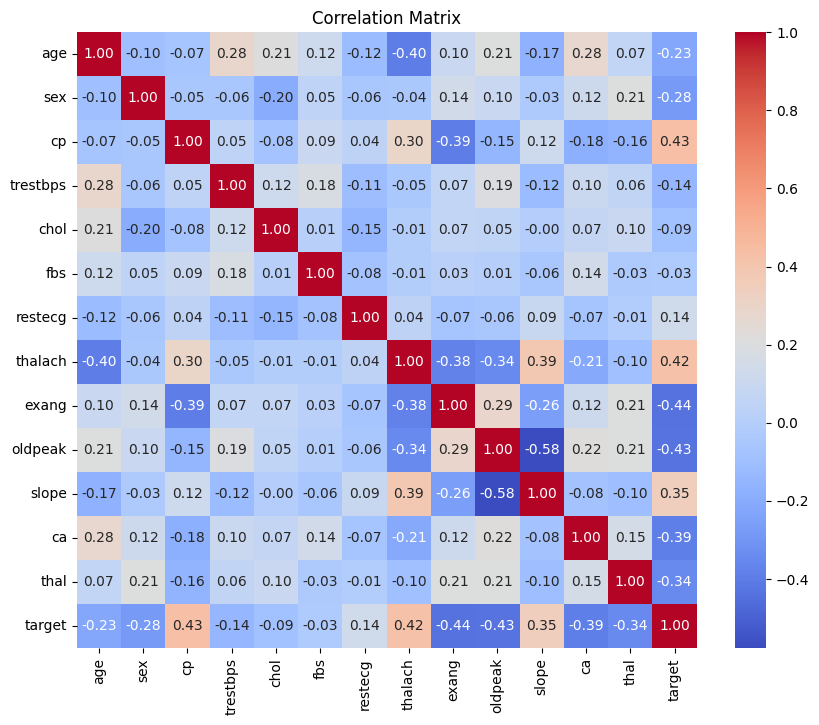

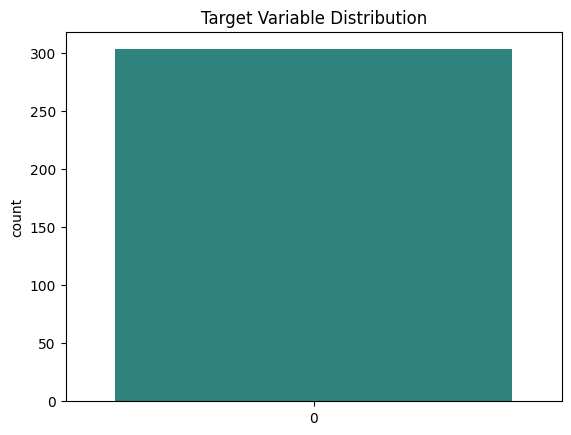

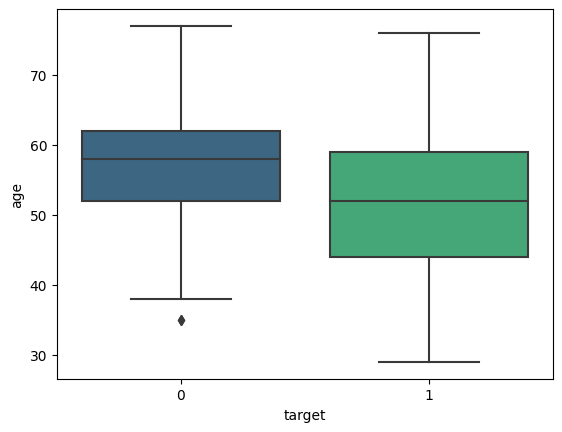

Random Forest Accuracy: 83.61%

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



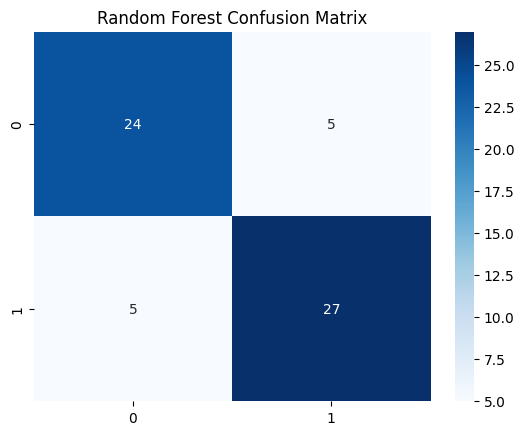

XGBoost Accuracy: 81.97%

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



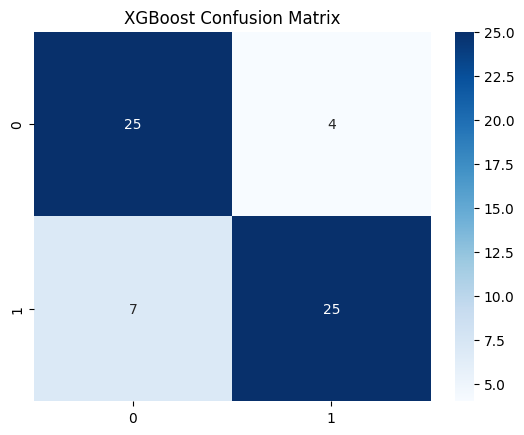

SVM Accuracy: 86.89%

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



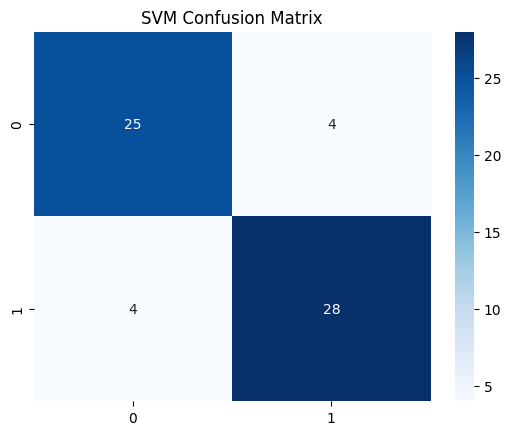

Hybrid Model Accuracy: 85.25%

Hybrid Model Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



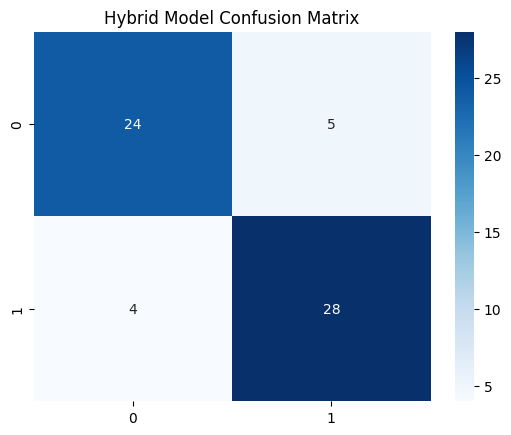

Random Forest AUC: 0.92
XGBoost AUC: 0.91
SVM AUC: 0.92
Hybrid Model AUC: 0.93


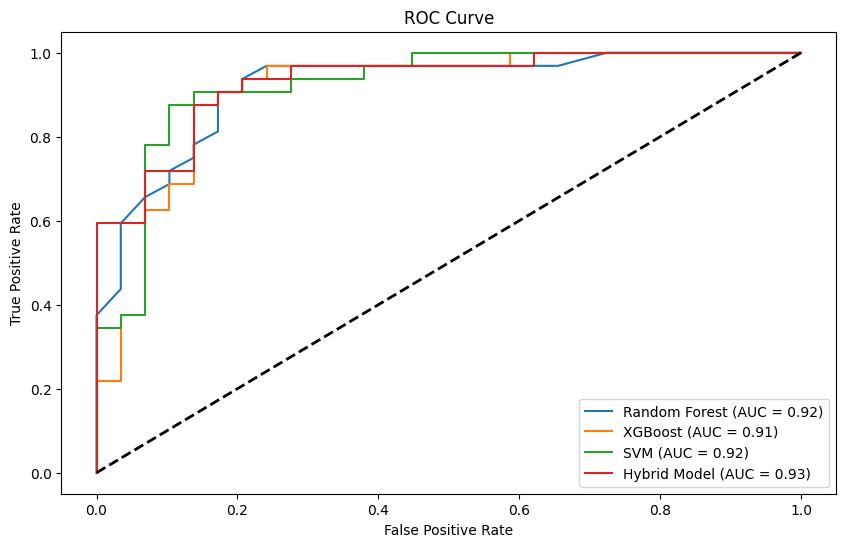

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import joblib

# Load dataset
data = pd.read_csv('/kaggle/input/heart-disease-risk-prediction-csv/heart-disease.csv')

# --- Exploratory Data Analysis (EDA) ---
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig("correlation_matrix.png")
plt.show()

# Target variable distribution
sns.countplot(data['target'], palette='viridis')
plt.title('Target Variable Distribution')
plt.savefig("target_distribution.png")
plt.show()

# Pairplot of features
sns.boxplot(data=data, x='target', y='age', palette='viridis')
plt.savefig("boxplot.png")
plt.show()

# --- Data Preprocessing ---
X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Model Training and Evaluation ---

# 1. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.savefig("rf_confusion_matrix.png")
plt.show()

# 2. XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_pred))

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, xgb_pred)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.savefig("xgb_confusion_matrix.png")
plt.show()

# 3. SVM Classifier
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))

# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.savefig("svm_confusion_matrix.png")
plt.show()

# 4. Hybrid Model (Voting Classifier)
hybrid_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('svm', svm_model)
    ],
    voting='soft'  # Use soft voting for probabilities
)
hybrid_model.fit(X_train, y_train)
hybrid_pred = hybrid_model.predict(X_test)
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
print(f"Hybrid Model Accuracy: {hybrid_accuracy * 100:.2f}%")
print("\nHybrid Model Classification Report:\n", classification_report(y_test, hybrid_pred))

# Confusion matrix
conf_matrix_hybrid = confusion_matrix(y_test, hybrid_pred)
sns.heatmap(conf_matrix_hybrid, annot=True, fmt='d', cmap='Blues')
plt.title('Hybrid Model Confusion Matrix')
plt.savefig("hybrid_confusion_matrix.png")
plt.show()

# --- Save Models ---
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(hybrid_model, 'hybrid_model.pkl')

# --- ROC Curve ---
rf_probs = rf_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.predict_proba(X_test)[:, 1]
hybrid_probs = hybrid_model.predict_proba(X_test)[:, 1]

rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
hybrid_auc = roc_auc_score(y_test, hybrid_probs)

print(f"Random Forest AUC: {rf_auc:.2f}")
print(f"XGBoost AUC: {xgb_auc:.2f}")
print(f"SVM AUC: {svm_auc:.2f}")
print(f"Hybrid Model AUC: {hybrid_auc:.2f}")

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
hybrid_fpr, hybrid_tpr, _ = roc_curve(y_test, hybrid_probs)

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(hybrid_fpr, hybrid_tpr, label=f'Hybrid Model (AUC = {hybrid_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("roc_curve.png")
plt.show()
